# **Basic Image Manipulations**

**How to perform image transformation:**

Accessing and manipulating images pixels, Image, resizing, Cropping, Flipping

In [3]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from IPython.display import Image
%matplotlib inline 

**Original road img**

[[80 80 80 ... 96 96 96]
 [81 81 81 ... 96 96 96]
 [83 82 81 ... 95 95 96]
 ...
 [62 62 62 ... 39 40 41]
 [62 61 59 ... 53 53 54]
 [60 58 55 ... 76 76 77]]


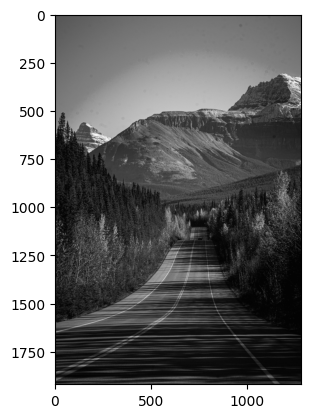

In [4]:
# Read img as gray scale
road_img=cv2.imread("C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/road.jpg",0)

# set color map to gray scale for proper rendering 
plt.imshow(road_img,cmap='gray')
print(road_img)

**Accessing Individual Pixels**

For accessing any pixel in a numpy matrix, you have to use matrix notation such as **matrix[r,c]**, r-> row no. & c-> column no.

In [5]:
# print the first pixel of the img
print(road_img[0,0])

80


# **Modifying Image Pixels** 

[[200  80  80 ...  96  96  96]
 [ 81  81  81 ...  96  96  96]
 [ 83  82 200 ...  95  95  96]
 ...
 [ 62  62  62 ...  39  40  41]
 [ 62  61  59 ...  53  53  54]
 [ 60  58  55 ...  76  76  77]]


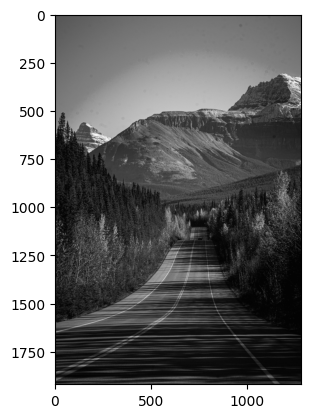

In [8]:
road_img_copy=road_img.copy()
road_img_copy[0,0]=200
road_img_copy[2,2]=200
road_img_copy[2,3]=200
road_img_copy[3,2]=200
road_img_copy[3,3]=200

plt.imshow(road_img_copy,cmap='gray')
print(road_img_copy)

# **Cropping Images**

Cropping an image is simply done by selecting a specific (pixel) region of the image

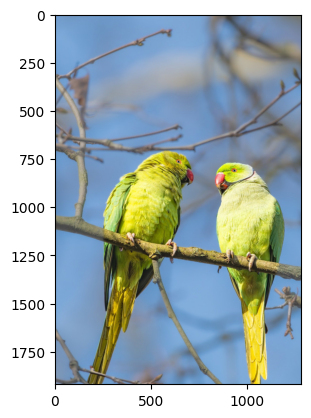

In [11]:
# Loading Image
parrot_img_brg=cv2.imread("C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/parrot.jpg",cv2.IMREAD_COLOR)
parrot_img_rgb=parrot_img_brg[:,:,::-1]

plt.imshow(parrot_img_rgb)

In [18]:
# Check image size 
print(parrot_img_rgb.shape)

(1920, 1280, 3)


(1920 ,1280, 3) -> (height(rows), width(columns), Color channel(RGB/BGR))

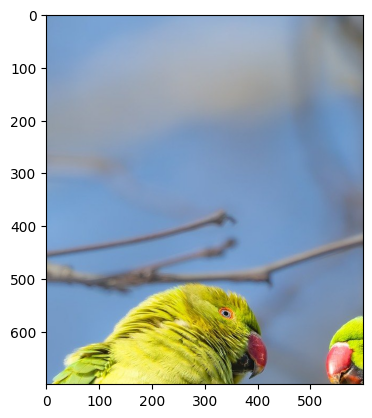

In [21]:
# Cropping a region of the image
# image[row_start : row_end , col_start : col_end]

crop_reg=parrot_img_rgb[200:900, 300:900]
plt.imshow(crop_reg)

# **Resizing Images**

The function **resize()** resizes the image **src** down to or up to the specified size. The size and type are derived from the src, dsize, fx, and fy.

Function Syntax

**dst = resize(src, dsize[, dst[, fx, fy[, interpolation]]]] )**

dst: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has 2 required arguments:
1. **src:** input image
2. **dsize:** output image size

Optional arguments that are often used include:
1. **fx:** Scale factor along the horizontal axis; when it equals 0, it is computed as (double)dsize.width/src.cols
2. **fy:** Scale factor along the vertical axis; when it equals 0, it is computed as (double)dsize.height/src.rows

The output image has the size dsize (when it is non-zero) or the size computed from **src.size()**, **fx**, and **fy**; the type of dst is the same as of src.

**Method 1: Specifying Scaling Factor using fx and fy**

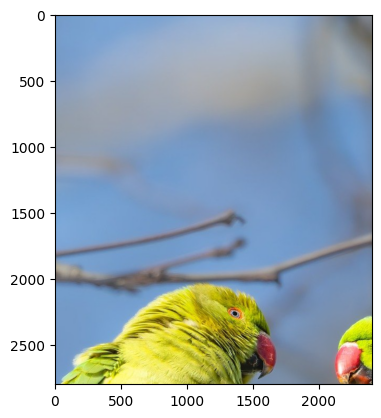

In [23]:
resized_cropped_reg_4x=cv2.resize(crop_reg,None,fx=4, fy=4)
plt.imshow(resized_cropped_reg_4x)

**Method 2: Specifyin exact size of the output image**

| Interpolation  | Best use                           |
| -------------- | ---------------------------------- |
| `INTER_AREA`   | Shrinking                          |
| `INTER_LINEAR` | General resizing                   |
| `INTER_CUBIC`  | Upscaling (better quality, slower) |


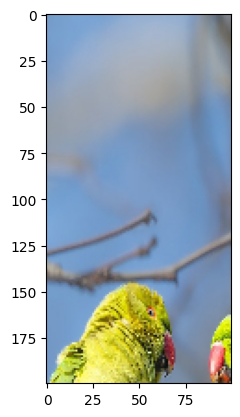

In [29]:
desired_width=100
desired_height=200
dim=(desired_width,desired_height)

# Resize background image to sae size as logo image
resized_crop_reg=cv2.resize(crop_reg,dsize=dim,interpolation=cv2.INTER_CUBIC)
plt.imshow(resized_crop_reg)

**Resize while maintaining aspect ratio**

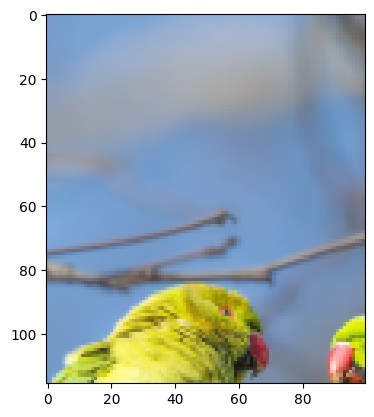

In [32]:
# Method : Using 'dsiz'
desired_width=100
aspect_ratio=desired_width/crop_reg.shape[1]
desired_height=int(crop_reg.shape[0]*aspect_ratio)
dim=(desired_width, desired_height)

# Resize image
resized_crop_reg=cv2.resize(crop_reg,dsize=dim,interpolation=cv2.INTER_AREA)
plt.imshow(resized_crop_reg)

# **Flipping Images**

The function **flip** flips the array in one of three different ways (row and column indices are 0-based):

Function Syntax

**dst cv.flip(src, flipCode )**

**dst**: output array of the same size and type as src.

The function has 2 required arguments:

1. **src:** input image
2. **flipCode:** a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis.Negative value (for example, -1) means flipping around both axes.

Text(0.5, 1.0, 'Orginial')

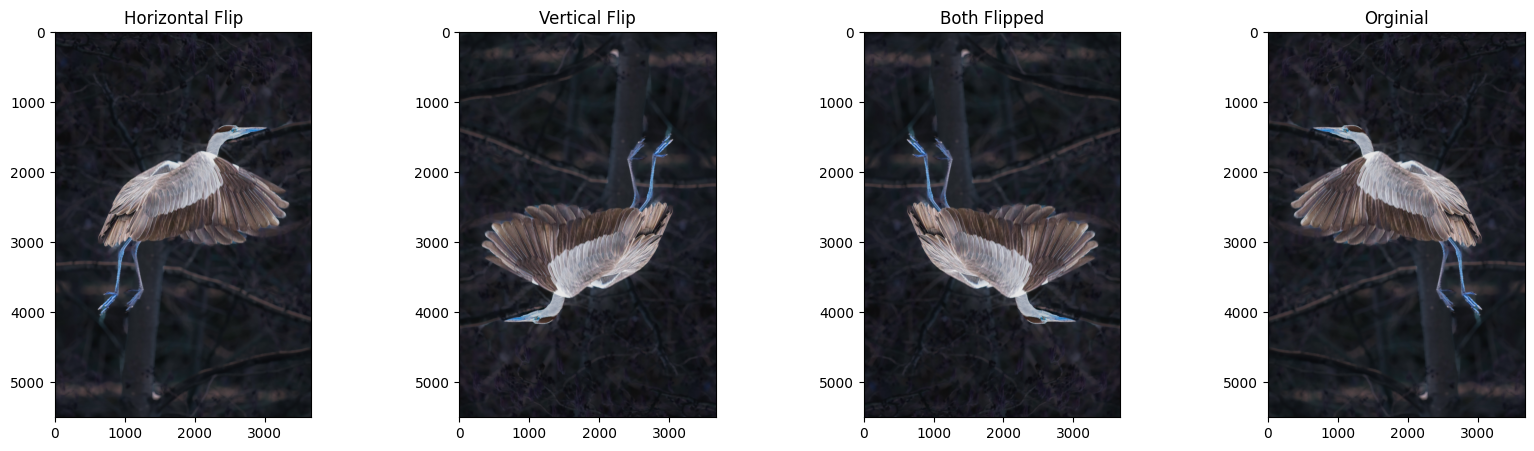

In [35]:
swan_img=cv2.imread("C:/Users/aumpa/OneDrive/Desktop/OpenCV/images/swan.jpg",cv2.IMREAD_COLOR)

swan_flip_horz=cv2.flip(swan_img,1)
swan_flip_vert=cv2.flip(swan_img,0)
swan_flip_both=cv2.flip(swan_img,-1)

# Show Images
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(swan_flip_horz);plt.title("Horizontal Flip")
plt.subplot(142);plt.imshow(swan_flip_vert);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(swan_flip_both);plt.title("Both Flipped")
plt.subplot(144);plt.imshow(swan_img);plt.title("Orginial")